In [1]:
!pip install yfinance

import pandas as pd
import numpy as np
%matplotlib inline
import matplotlib.pyplot as plt
import datetime
import yfinance as yf

start = datetime.datetime(2015, 1, 1)
end = datetime.datetime(2021, 1, 1)  # Adjust the end date as needed

df = yf.download("ETH-USD", start=start, end=end)


Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
[*********************100%***********************]  1 of 1 completed


In [2]:
train=df.iloc[:1120]
test=df[1120:]

In [3]:
train.columns

Index(['Open', 'High', 'Low', 'Close', 'Adj Close', 'Volume'], dtype='object')

In [4]:
y_train=train.drop(['High','Low','Open','Volume','Adj Close'],axis=1).values

In [5]:
X_train=np.arange(0,1120).reshape(-1,1)

In [6]:
len(X_train)==len(y_train)

True

1. Linear Regression


In [7]:
from sklearn.linear_model import LinearRegression

model=LinearRegression()
### Fit/Train on the training data

model.fit(X_train,y_train)


LinearRegression()



*   For prediction on test data



In [9]:
y_test=test.drop(['High','Low','Open','Volume','Adj Close'],axis=1).values
X_test=np.arange(0,29).reshape(-1,1)
preds=model.predict(X_test)
test['preds']=preds

<ipython-input-9-473fbd998f59>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  test['preds']=preds


In [10]:
from sklearn.metrics import mean_absolute_error

test

,Open,High,Low,Close,Adj Close,Volume,preds
Date,,,,,,,
2020-12-03,598.459229,622.452698,588.346375,616.708740,616.708740,16146190946,515.089681
2020-12-04,616.722778,618.983154,569.283508,569.354187,569.354187,16337589997,514.752287
2020-12-05,569.347656,596.595459,563.106628,596.595459,596.595459,13498010566,514.414894
2020-12-06,596.568665,606.791931,584.411743,601.908997,601.908997,11290893016,514.077501
2020-12-07,601.797119,602.917908,585.428650,591.843384,591.843384,10720480962,513.740107
2020-12-08,591.900818,594.751587,552.469238,554.827759,554.827759,14398919320,513.402714
2020-12-09,554.792908,577.288391,532.998413,573.479126,573.479126,15855915840,513.065321
2020-12-10,573.504028,574.600159,549.784058,559.678528,559.678528,11672582040,512.727927
2020-12-11,559.679199,560.376709,537.811646,545.797363,545.797363,11098819124,512.390534


In [11]:
linear_regression_test_error=mean_absolute_error(test['Close'],test['preds'])**0.5




*   To plot a graph for test data prediction results
*   For prediction on training data



<Axes: xlabel='Date'>

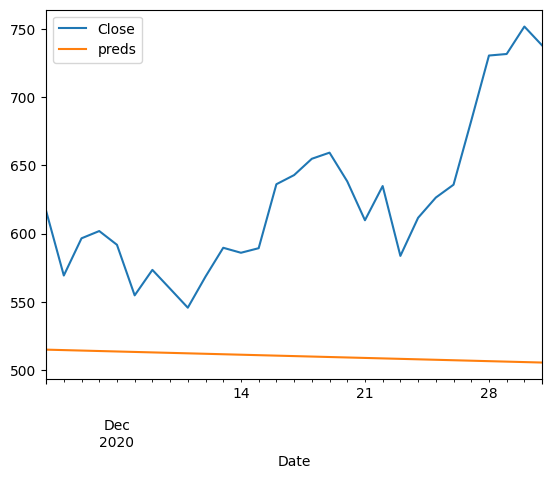

In [12]:
test=test.drop(['High','Low','Open','Volume','Adj Close'],axis=1)
test.plot()

In [13]:
preds=model.predict(X_train)
train['preds']=preds

<ipython-input-13-0a79213f1326>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  train['preds']=preds




*   To plot price for Closing, 1 month-SMA and 2 weeks- SMA
*   To plot price for Closing, and EWMA12



<Axes: xlabel='Date'>

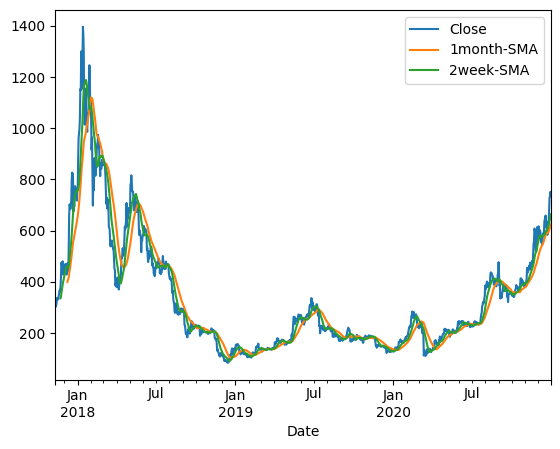

In [14]:
train=df.iloc[:754]
test=df.iloc[754:]
df=df.drop(['High','Low','Open','Volume','Adj Close'],axis=1)

df['1month-SMA']=df['Close'].rolling(window=30).mean()
df['2week-SMA']=df['Close'].rolling(window=14).mean()

df.head(15)

df.plot()

<Axes: xlabel='Date'>

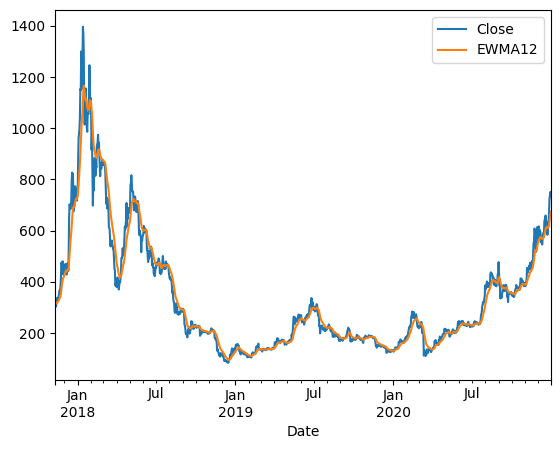

In [16]:
df['EWMA12']=df['Close'].ewm(span=14,adjust=False).mean()
df[['Close','EWMA12']].plot()

2. Exponential Smoothing

In [17]:
from statsmodels.tsa.holtwinters import SimpleExpSmoothing

span=14
alpha=2/(span+1)
df['EWMA14']=df['Close'].ewm(alpha=alpha,adjust=False).mean()
df['SES14']=SimpleExpSmoothing(df['Close']).fit(smoothing_level=alpha,optimized=False).fittedvalues.shift(-1)
df.head()

/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)


,Close,1month-SMA,2week-SMA,EWA12,EWMA12,EWMA14,SES14
Date,,,,,,,
2017-11-09,320.884003,NaN,NaN,320.884003,320.884003,320.884003,320.884003
2017-11-10,299.252991,NaN,NaN,317.999868,317.999868,317.999868,317.999868
2017-11-11,314.681000,NaN,NaN,317.557352,317.557352,317.557352,317.557352
2017-11-12,307.907990,NaN,NaN,316.270770,316.270770,316.270770,316.270770
2017-11-13,316.716003,NaN,NaN,316.330135,316.330135,316.330135,316.330135




*   To make test predictions



In [20]:
from statsmodels.tsa.holtwinters import ExponentialSmoothing

fitted_model=ExponentialSmoothing(train['Close'],trend='mul',seasonal='mul',seasonal_periods=14).fit()

test_predictions=fitted_model.forecast(30).rename('HW Forecast')
test_predictions

/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/holtwinters/model.py:83: RuntimeWarning: overflow encountered in matmul
  return err.T @ err


2019-12-03    143.781234
2019-12-04    141.959283
2019-12-05    140.929226
2019-12-06    137.463042
2019-12-07    140.268984
2019-12-08    137.921700
2019-12-09    135.600543
2019-12-10    137.377391
2019-12-11    135.659804
2019-12-12    133.229416
2019-12-13    136.122713
2019-12-14    137.523820
2019-12-15    138.937970
2019-12-16    137.507946
2019-12-17    132.636397
2019-12-18    130.955670
2019-12-19    130.005455
2019-12-20    126.807943
2019-12-21    129.396390
2019-12-22    127.231049
2019-12-23    125.089811
2019-12-24    126.728931
2019-12-25    125.144478
2019-12-26    122.902476
2019-12-27    125.571506
2019-12-28    126.864010
2019-12-29    128.168546
2019-12-30    126.849366
2019-12-31    122.355423
2020-01-01    120.804973
Freq: D, Name: HW Forecast, dtype: float64



*   To plot test and train data split for closing price 
*   To plot test,train and prediction data of closing price


*   To plot test,train and predictions data of closing price in elaborated view
*   To make prediction on EWMA14 and SES14





In [22]:
test['preds_exp']=test_predictions

<ipython-input-22-5b427ec20ac7>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  test['preds_exp']=test_predictions




*   To plot test and train data split for closing price



<Axes: xlabel='Date'>

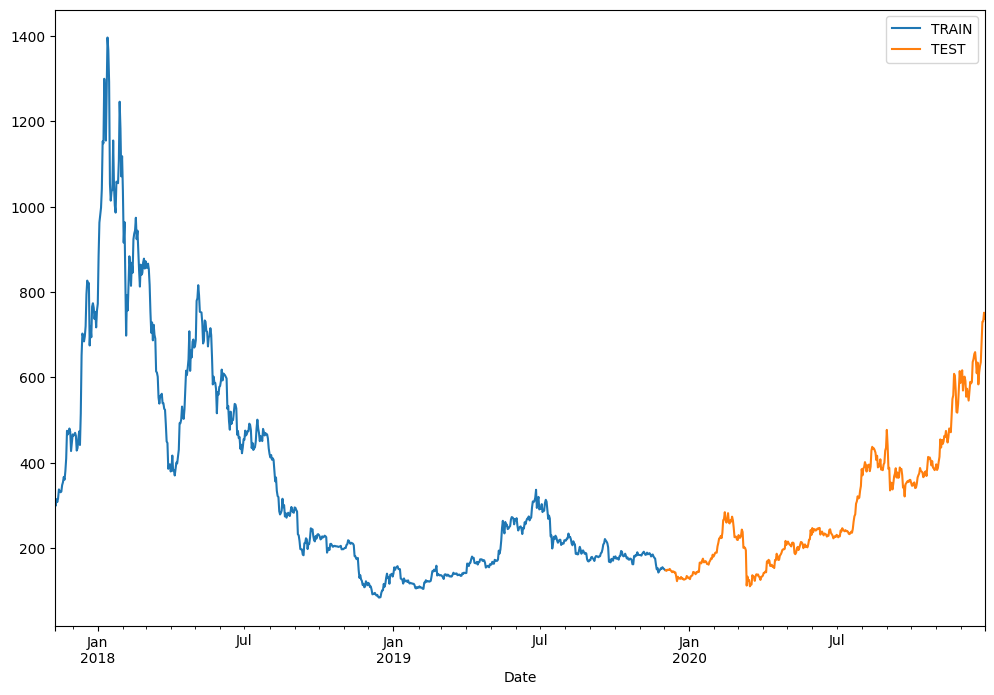

In [24]:
#exponential_test_error=mean_absolute_error(test['Close'],test['preds_exp'])**0.5

train['Close'].plot(legend=True,label='TRAIN')
test['Close'].plot(legend=True,label='TEST',figsize=(12,8))



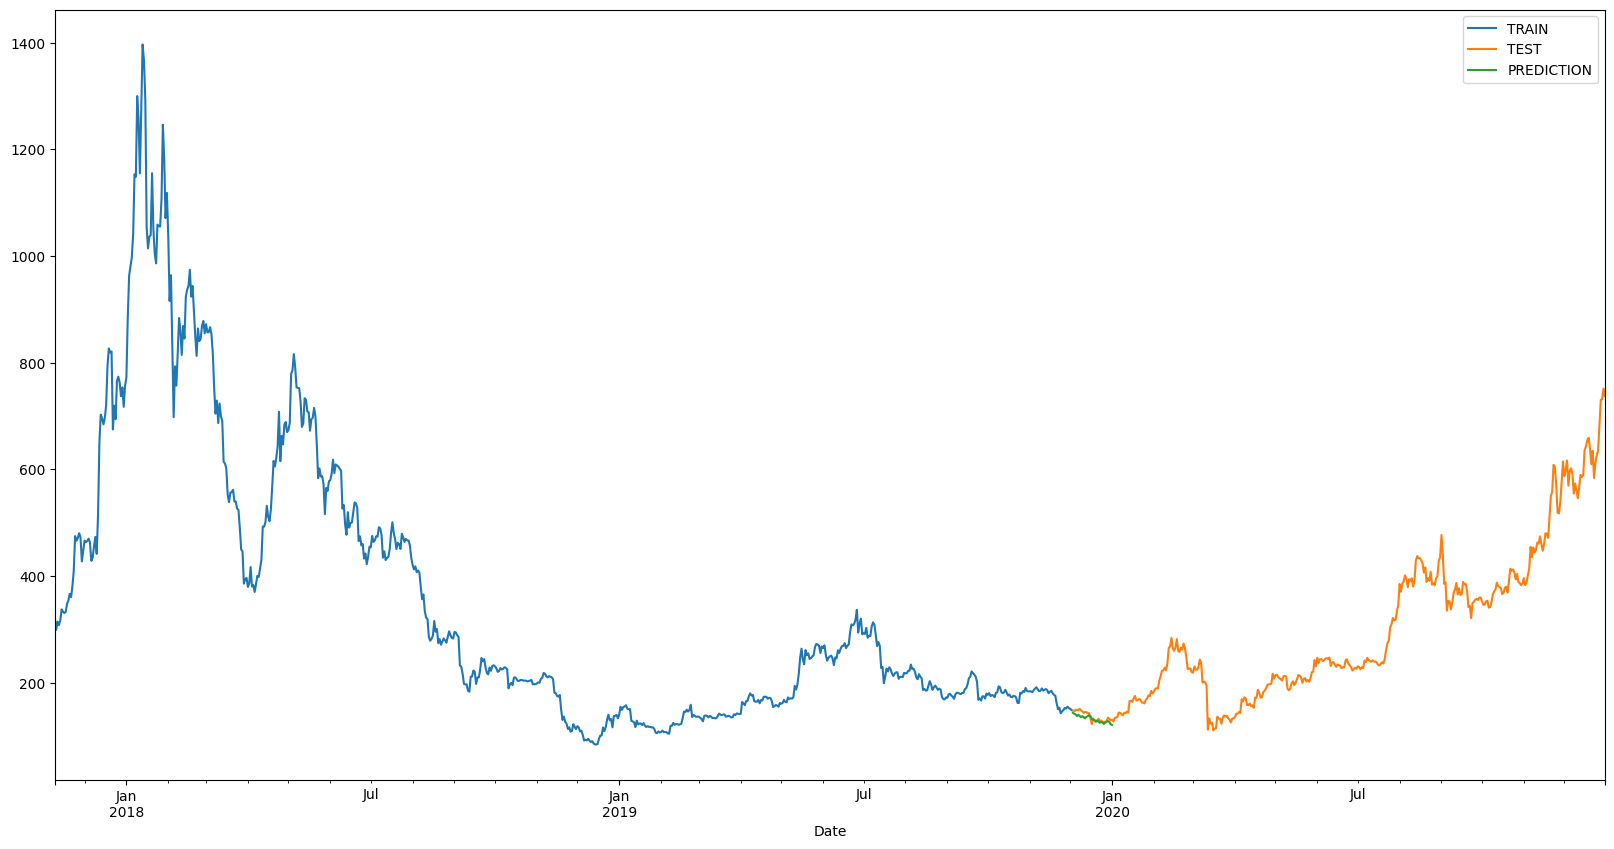

In [26]:
train['Close'].plot(legend=True,label='TRAIN')
test['Close'].plot(legend=True,label='TEST',figsize=(20,10))

test_predictions.plot(legend=True, label='PREDICTION');

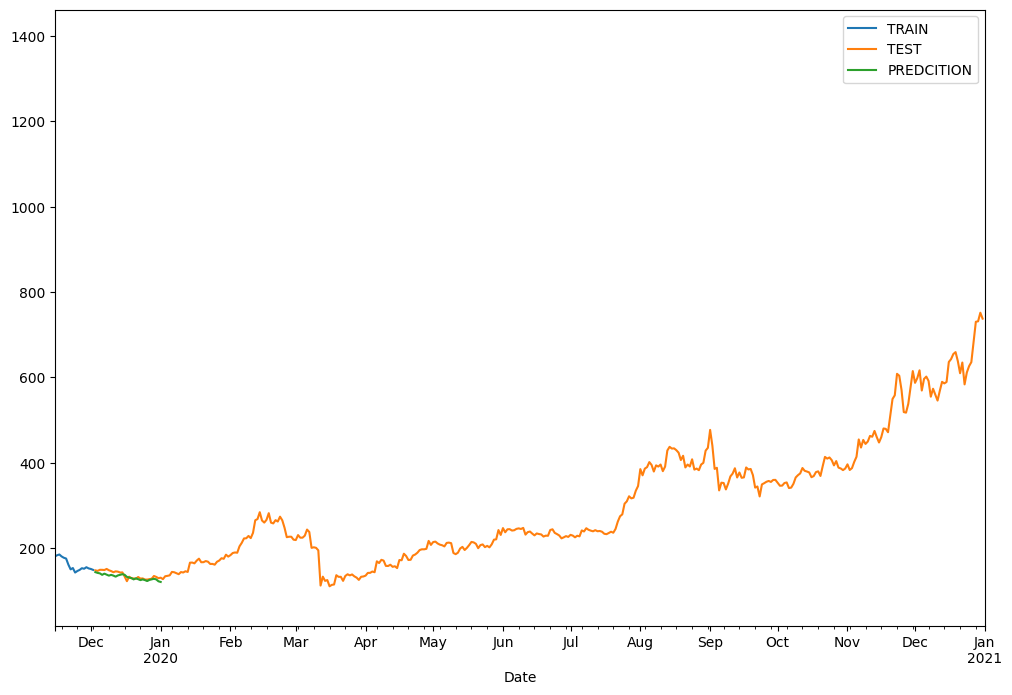

In [28]:
train['Close'].plot(legend=True,label='TRAIN')
test['Close'].plot(legend=True,label='TEST',figsize=(12,8))
test_predictions.plot(legend=True,label='PREDCITION',xlim=['2019-11-15','2021-01-01']);

In [32]:
train=df.iloc[:1120]
test=df.iloc[1120:]

train.columns

#y_train=train.drop(['High','Low','Open','Volume','Adj Close'],axis=1).values
X_train=np.arange(0,1120).reshape(-1,1)

len(X_train)==len(y_train)

model.fit(X_train,y_train)
#y_test=test.drop(['High','Low','Open','Volume','Adj Close'],axis=1).values
X_test=np.arange(0,30).reshape(-1,1)
pred=model.predict(X_test)

train


,Close,1month-SMA,2week-SMA,EWA12,EWMA12,EWMA14,SES14
Date,,,,,,,
2017-11-09,320.884003,NaN,NaN,320.884003,320.884003,320.884003,320.884003
2017-11-10,299.252991,NaN,NaN,317.999868,317.999868,317.999868,317.999868
2017-11-11,314.681000,NaN,NaN,317.557352,317.557352,317.557352,317.557352
2017-11-12,307.907990,NaN,NaN,316.270770,316.270770,316.270770,316.270770
2017-11-13,316.716003,NaN,NaN,316.330135,316.330135,316.330135,316.330135
...,...,...,...,...,...,...,...
2020-11-28,538.229797,472.104838,522.416885,523.795478,523.795478,523.795478,523.795478
2020-11-29,575.758057,478.536107,531.573955,530.723822,530.723822,530.723822,530.723822
2020-11-30,614.842529,486.144514,542.638399,541.939650,541.939650,541.939650,541.939650


3. Decision Tree

In [34]:
from sklearn.tree import DecisionTreeRegressor

model = DecisionTreeRegressor()
# Fit/Train the model on the training data
model.fit(X_train, y_train)


DecisionTreeRegressor()

In [35]:
y_train

array([[320.88400269],
       [299.25299072],
       [314.68099976],
       ...,
       [614.8425293 ],
       [587.32415771],
       [598.35235596]])

In [38]:
pred=model.predict(X_test)
(test['Close'].values).shape
preds[1]
decision_test_error = mean_absolute_error(test['Close'].values, preds[:len(test['Close'].values)]) ** 0.5

In [39]:
preds

array([[515.08968079],
       [514.75228745],
       [514.41489411],
       ...,
       [138.22131904],
       [137.8839257 ],
       [137.54653236]])



*  To plot predictions and closing price on test data




<ipython-input-42-dcf5cba2c9d8>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  test['preds']=preds


<Axes: xlabel='Date'>

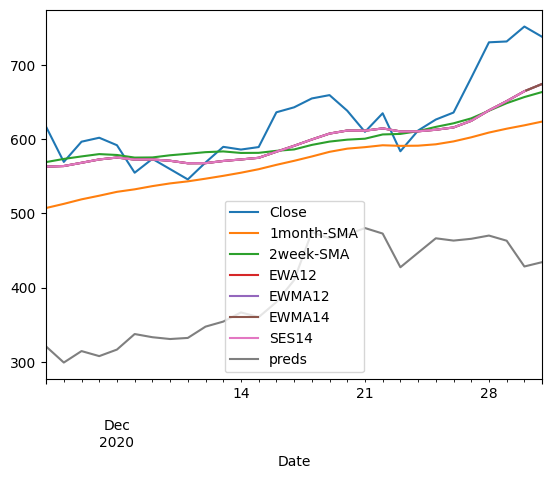

In [42]:
X_test=np.arange(0,29).reshape(-1,1)
preds=model.predict(X_test)
test['preds']=preds
test.plot()



*   To plot predictions and closing  price on train data


<ipython-input-44-1020d24cf97f>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  train['preds']=preds


<Axes: xlabel='Date'>

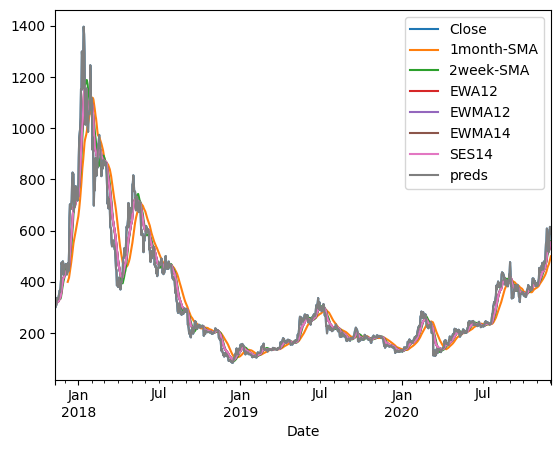

In [44]:
X_train=np.arange(0,1120).reshape(-1,1)
preds=model.predict(X_train)
train['preds']=preds
#train=train.drop(['High','Low','Open','Volume','Adj Close'],axis=1)
train.plot()



*   Comparitive analysis based on RMSE



In [47]:
exponential_test_error=mean_absolute_error(test['Close'],test['preds'])**0.5
data={'DecisionTree_RMSE':[decision_test_error],
      'ExponentialSmoothing_RMSE':[exponential_test_error],
      'LinearRegression_RMSE':[linear_regression_test_error]}
pf=pd.DataFrame(data)      


In [48]:
pf

,DecisionTree_RMSE,ExponentialSmoothing_RMSE,LinearRegression_RMSE
0,10.6849,15.045948,10.6849
